Importing dependencies 

In [88]:
import pandas as pd
import datetime
import seaborn as sns

---

## Section 2 - Data loading

Let's read the CSV file into a pandas dataframe and see what it looks like

In [81]:
df = pd.read_csv('data/sample_sales_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

In [82]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


---

## Section 3 - Descriptive statistics


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [124]:

df.duplicated().any()

False

In [125]:
df.duplicated(subset=['transaction_id']).any()

False

In [67]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [ ]:
print(f'first date in the data set - {df.timestamp.min()}')
print(f'last date in the dataset {df.timestamp.max()}')

start date in the data set - 2022-03-01 09:00:13
last date in the dataset 2022-03-07 19:59:54


---
## Section 4 - Visualisation

In [94]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  """ 
   This is to visualise the distribution of numeric columns
  """
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');


def get_unique_values(data, column):
  """ 
  This is to show how many unique values are present within a column
  """
  num_unique_values = data[column].nunique()
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)


def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  """ 
  This is to visualise the distribution of categorical columns
    """
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).tick_params(axis='x', rotation=30).set(title=f'Distribution of {column}');


def correlation_plot(data: pd.DataFrame = None):
  """ 
  This is to plot the correlations between the numeric columns within the data
     """
  corr = df.corr()
  corr.style.background_gradient(cmap='coolwarm')

In [98]:
get_unique_values(df, 'category')

Column: category has 22 unique values

category
fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: count, dtype: int64


In [132]:
get_unique_values(df, 'product_id')

Column: product_id has 300 unique values

product_id
ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: count, Length: 300, dtype: int64


In [131]:
# revenue generated by each product and quantity sold
df[['product_id', 'quantity', 'total']].groupby(['product_id']).sum(['quantity','total']).sort_values(['quantity','total'])

,quantity,total
product_id,,
c8de27d0-2c44-4b5a-b178-59c45d054ccb,7,3.43
ec0bb9b5-45e3-4de8-963d-e92aa91a201e,7,38.43
49f7d4a9-713a-4824-b378-aebb33ff8b2f,9,80.91
cb348f80-8092-496e-91c8-af88d817ec42,12,62.28
acaefd9d-c58a-4c70-89cb-5dbebfaf6495,13,97.37
...,...,...
35e00193-aa27-4121-87f4-6ac0d8a8671f,252,123.48
7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,254,1140.46
7c55cbd4-f306-4c04-a030-628cbe7867c1,259,49.21


/Users/dhruvinandipara/anaconda3/envs/test_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


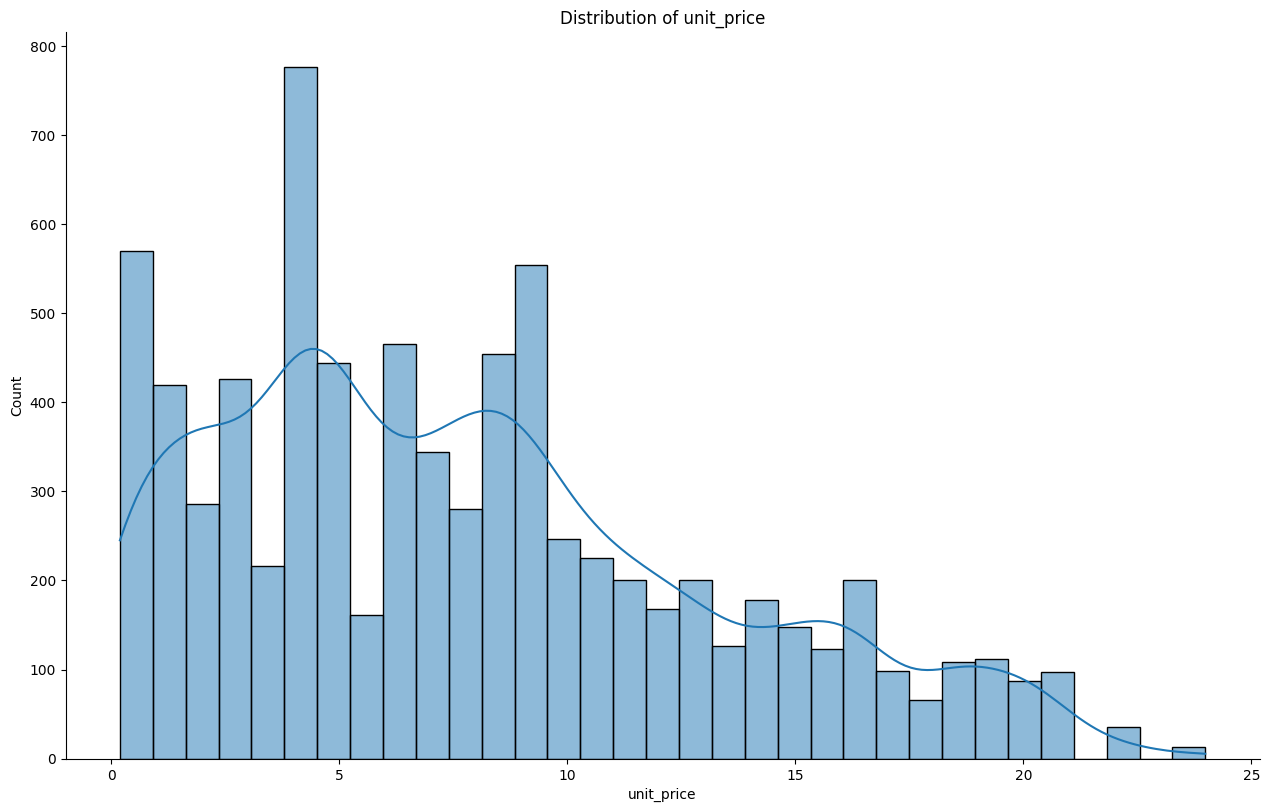

In [101]:
plot_continuous_distribution(df, 'unit_price')

/Users/dhruvinandipara/anaconda3/envs/test_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


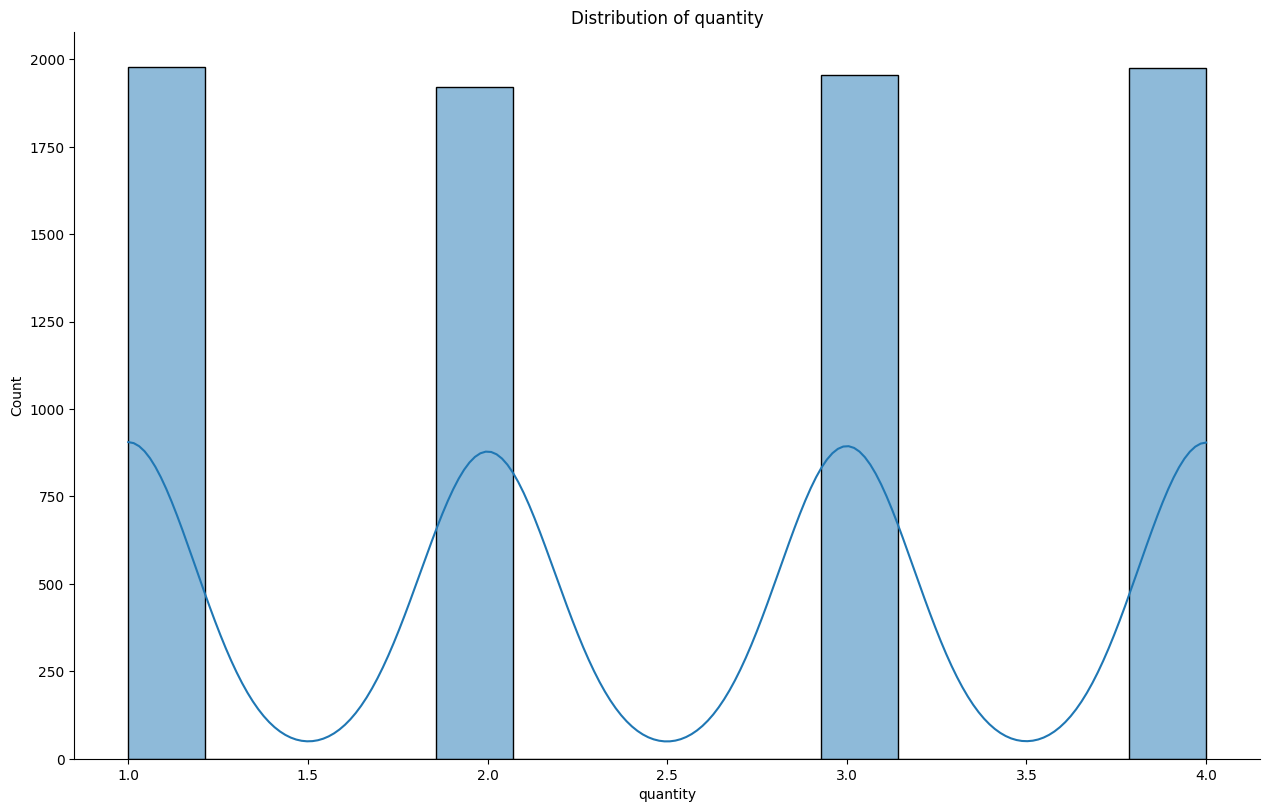

In [72]:
plot_continuous_distribution(df, 'quantity')

/Users/dhruvinandipara/anaconda3/envs/test_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


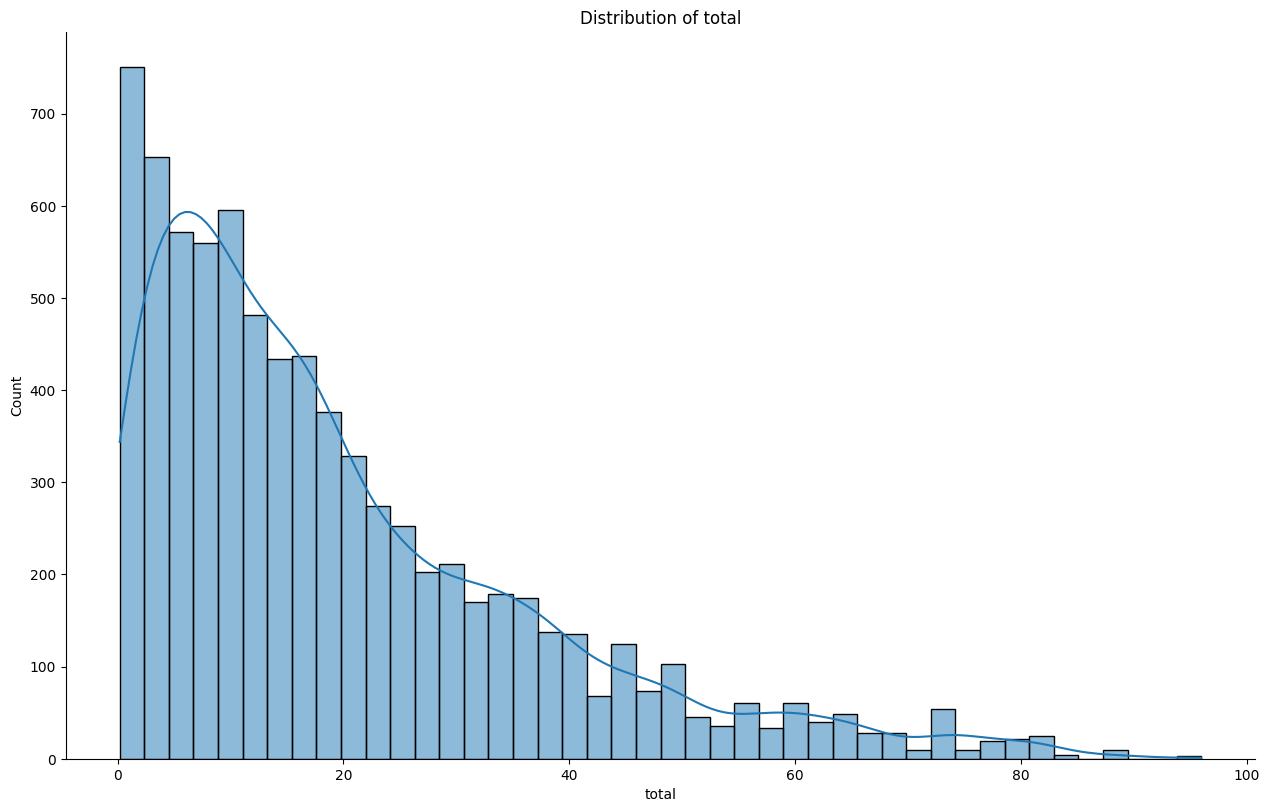

In [73]:
plot_continuous_distribution(df, 'total')

/Users/dhruvinandipara/anaconda3/envs/test_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


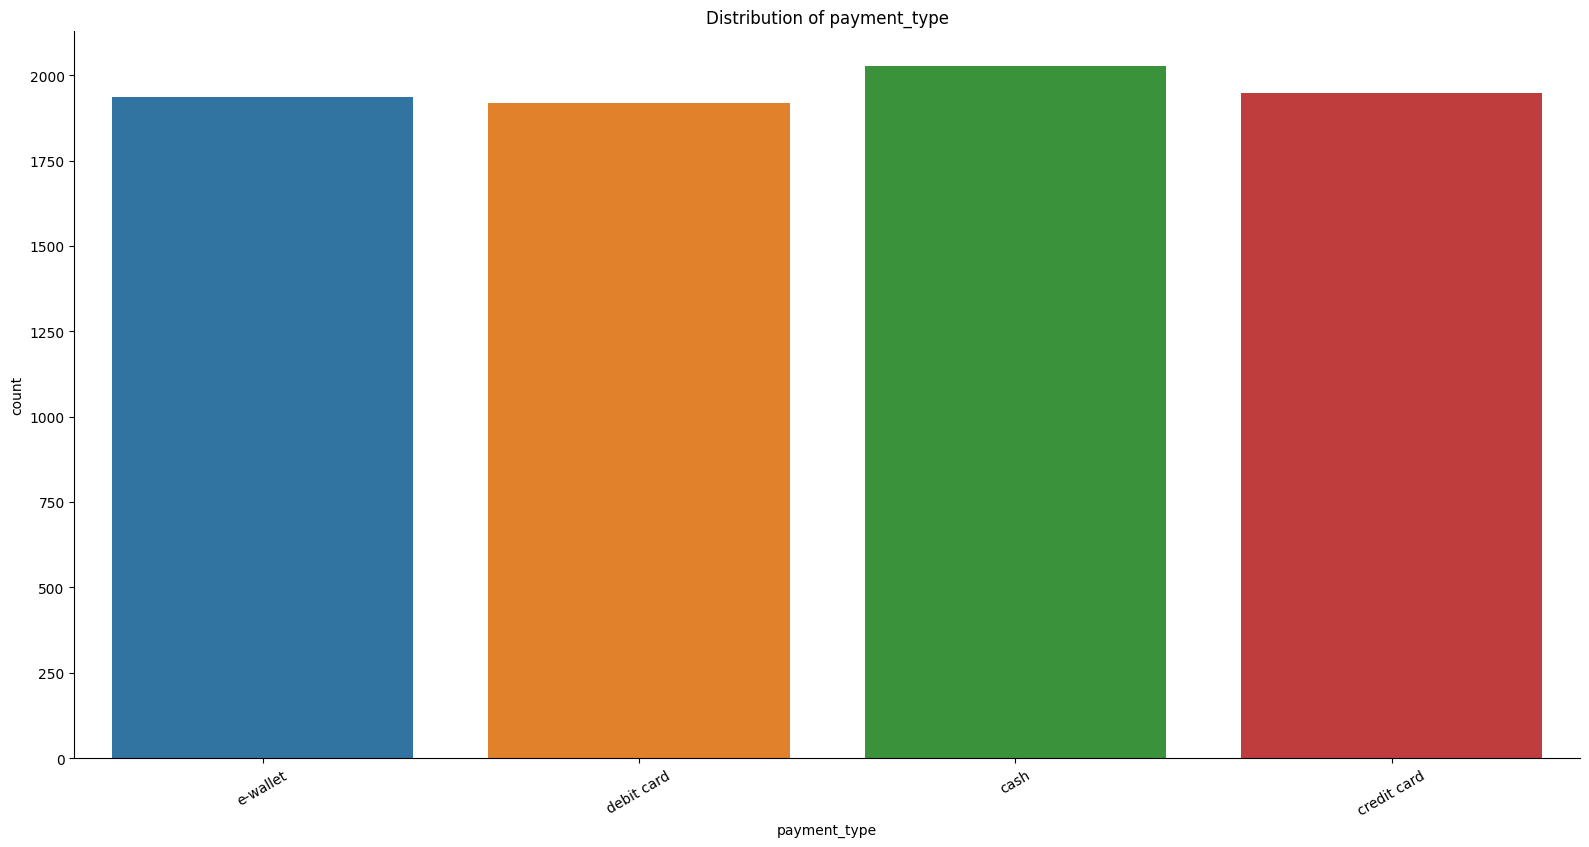

In [74]:
plot_categorical_distribution(df, 'payment_type')

/Users/dhruvinandipara/anaconda3/envs/test_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


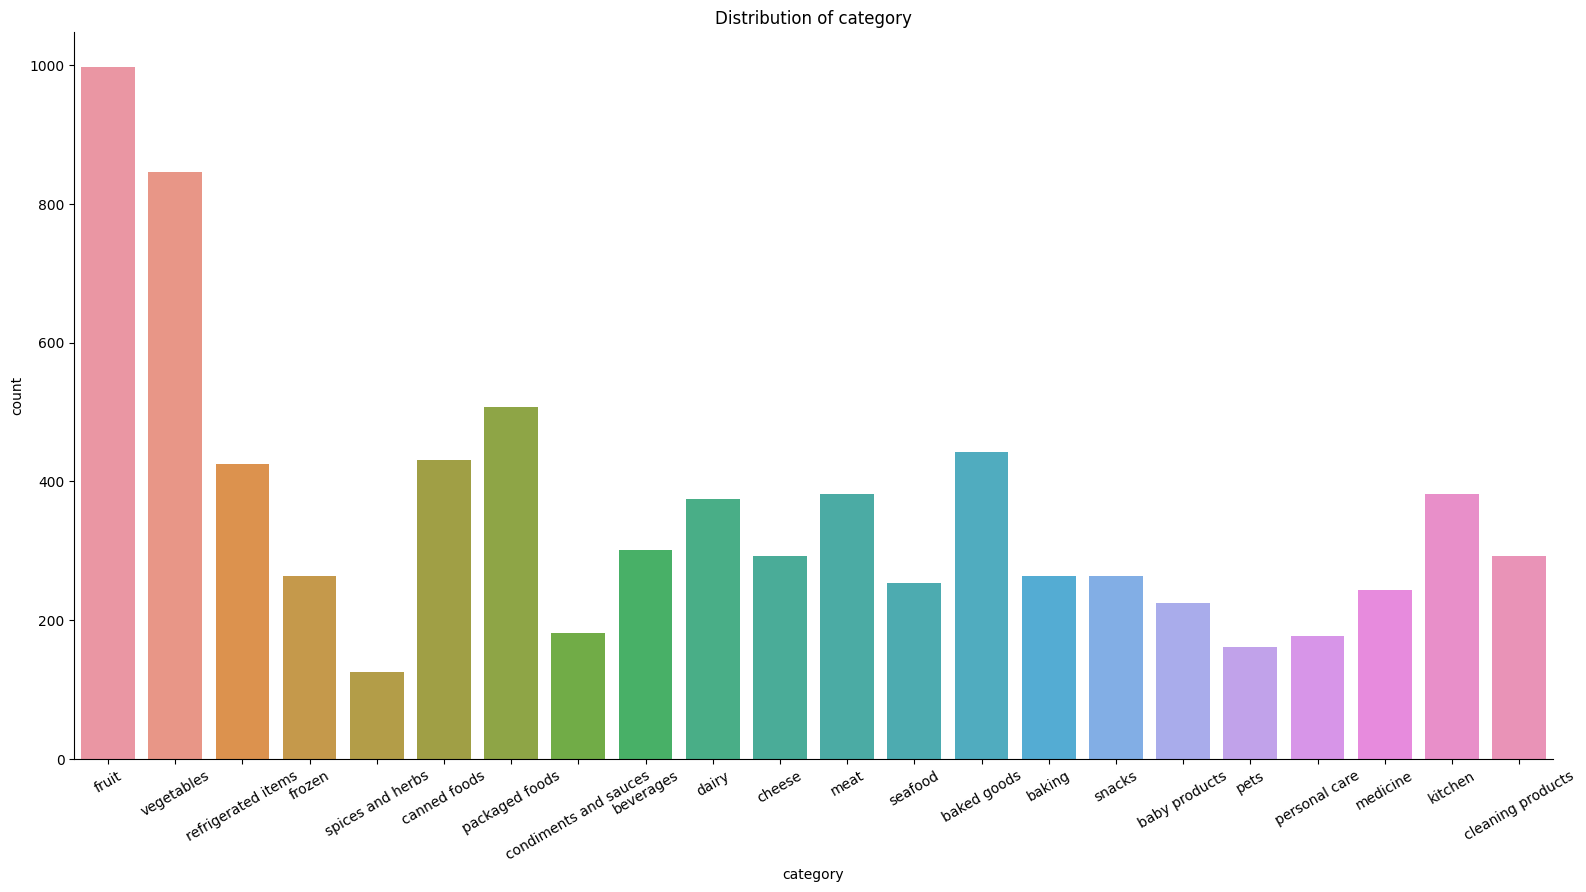

In [75]:
plot_categorical_distribution(df, 'category')

/Users/dhruvinandipara/anaconda3/envs/test_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


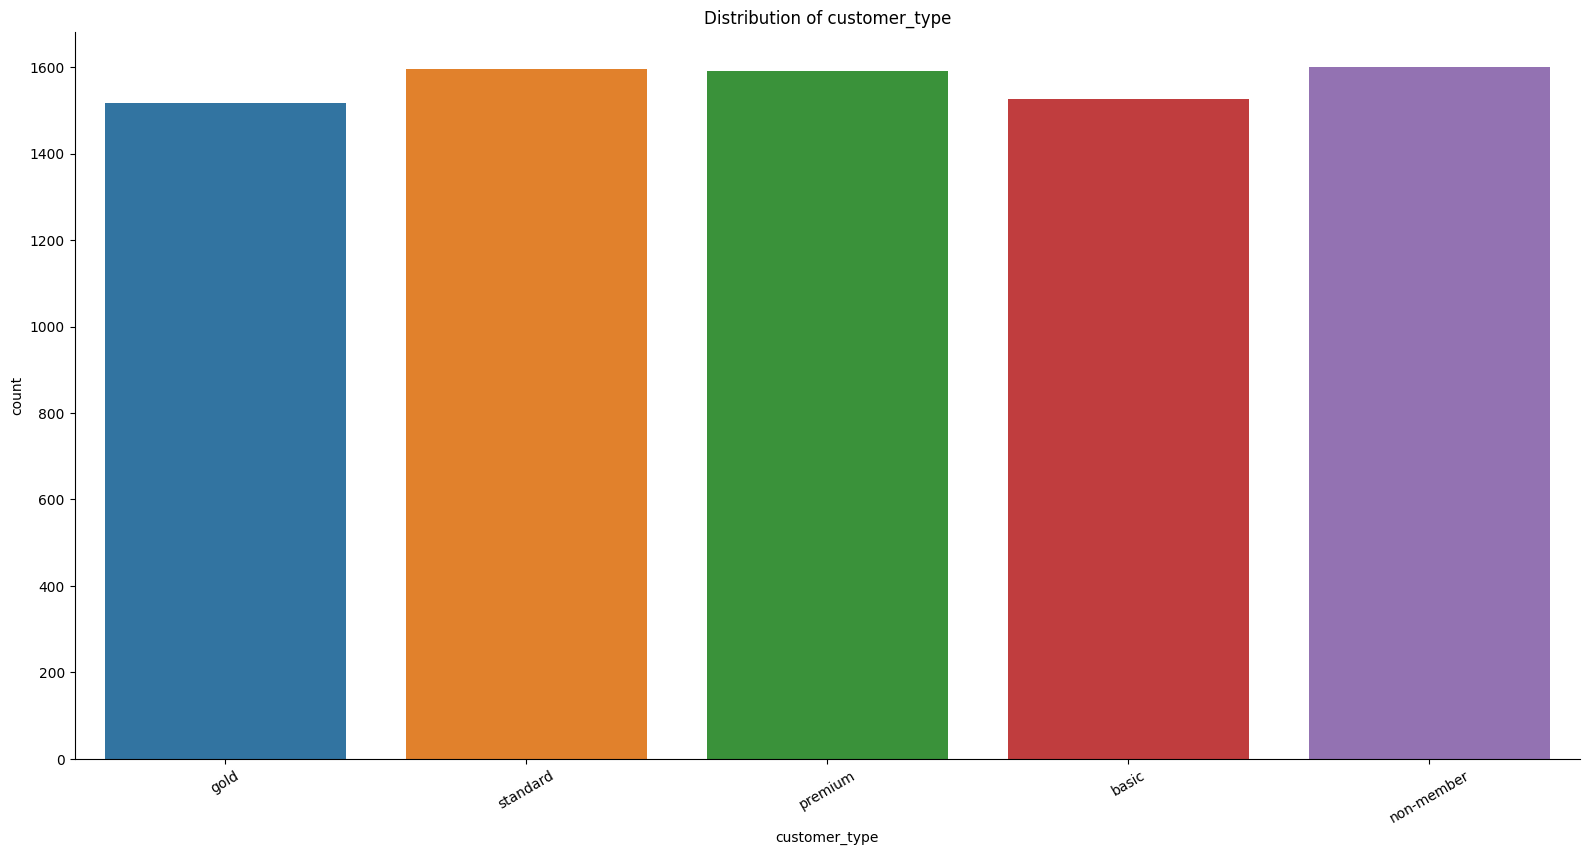

In [76]:
plot_categorical_distribution(df, 'customer_type')

Now it is your chance to visualise the columns, give it your best shot! As well as simply visualising the columns, try to interpret what the results mean in the context of the client.

---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data. 

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for

